# 台灣用電初探

台灣電力短缺的問題日益嚴重。本專案想帶領各位同學，利用公開資料，以及年會課程學到的資料處理技術，初步分析各產業別用電的經濟效應。

## 台電歷年尖峰負載及備用容量率


我國的政府公開資料平台中，有提供[台電歷年尖峰負載及備用容量率](http://data.gov.tw/node/8307)的資料。下載之後，我們可以利用`read.table`和`file`的函數來告知R 資料的文字編碼，並將表格讀入R中。透過網站說明，我們需要使用`UTF-16`作為編碼，才能正確解碼檔案中的中文。

In [1]:
# 檢查檔案內容是否正確

stopifnot(tools::md5sum("percent_operating_reserve.csv") == "aa6800cb2c6421358dfad782dc95dcfa")

# 以下的程式碼出錯了，請校正

percent_operating_reserve <- read.table(file(percent_operating_reserve.csv, encoding = "UTF-16"),
                                       header = TRUE, check.names = FALSE)

In [5]:
stopifnot(nrow(percent_operating_reserve) == 33)

### 計算歷年平均負載

在描述一個連串數據時，我們最常使用的是平均數。以下範例的目的是要先整理資料後，計算歷年來尖峰負載的平均。

In [11]:
# 透過查詢colnames，我們知道尖峰負載是在第二行，單位是：「萬瓩」
colnames(percent_operating_reserve)

[1] "年別(民國)"     "尖峰負載(萬瓩)" "備用容量率(%)" 

In [20]:
# 檢查raw data
head(percent_operating_reserve[[2]])

[1] 691.8   780.8   851.7   871.6   990.0   1,111.3
33 Levels: 1,111.3 1,233.1 1,342.2 1,451.1 1,532.1 1,670.4 1,766.6 ... 990.0

In [12]:
# 但是直接計算歷年尖峰負載的平均會導致以下錯誤：

mean(percent_operating_reserve[[2]])

Warning message:
In mean.default(percent_operating_reserve[[2]]): argument is not numeric or logical: returning NA

[1] NA

In [13]:
# 先利用class查詢第二行的形態，請修改下列的程式碼

class(percent_operating_reserve<<你的程式碼>>)

[1] "factor"

`factor`不是數值形態，所以R如果直接計算平均數的時候，會回傳`NA`(Not Available)。ps. 同學可以仔細閱讀R的警告訊息：*In mean.default(percent_operating_reserve[[2]]): argument is not numeric or logical: returning NA* 裡面就明確地指出，參數不是`numeric`或`logical`，所以回傳`NA`。

In [17]:
# 利用as.numeric函數做轉換
annual_max_power <- as.numeric(<<你的程式碼>>)

 [1] 29 30 31 32 33  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 22
[26] 23 21 20 24 26 25 27 28

In [19]:
# 利用mean計算轉換後的平均
print(annual_max_power_mean <- mean(<<你的程式碼>>))
stopifnot(annual_max_power_mean == 17)

[1] 17

各位同學會不會覺得算出來的數字怪怪的：平均數居然是一個乾淨的整數，通常平均數都會混雜大量的小數。如果仔細比對`as.numeric(percent_operating_reserve[[2]])`和`head(percent_operating_reserve[[2]])`的結果，就會發現`as.numeric`的結果不正確。在R之中，對於`factor`形態正確的處理方式，是透過`as.character` + `as.numeric`：

In [22]:
as.numeric(as.character(<<你的程式碼>>))

Warning message:
In eval(expr, envir, enclos): NAs introduced by coercion

 [1] 691.8 780.8 851.7 871.6 990.0    NA    NA    NA    NA    NA    NA    NA
[13]    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
[25]    NA    NA    NA    NA    NA    NA    NA    NA    NA

我們在結果中看到了`NA`，例如`percent_operating_reserve`的第6個元素：

In [27]:
percent_operating_reserve[[2]][6]

[1] 1,111.3
33 Levels: 1,111.3 1,233.1 1,342.2 1,451.1 1,532.1 1,670.4 1,766.6 ... 990.0

我們可以看到，第六個元素包含了`,`，而這是在實際處理數據常常遇到的狀況。為了要讓R計算正確的結果，我們需要先用`gsub`把`,`移除：

In [28]:
# 請利用gsub移除文字中的“,"

annual_max_power_cleaned <- gsub(pattern = ",", replacement = "", x = percent_operating_reserve[[2]])

`gsub`也直接會把輸出結果轉換成`character`，所以我們不需要再使用`as.character`，直接使用`as.numeric`即可。

In [31]:
# 請利用as.numeric將資料轉換成數值形態

annual_max_power <- as.numeric(<<你的程式碼>>)

In [36]:
# 請利用mean計算歷年尖峰負載的平均

annual_max_power_mean <- mean(<<你的程式碼>>)

stopifnot(all.equal(annual_max_power_mean, 2233.903))

### 繪製歷年尖峰負載圖

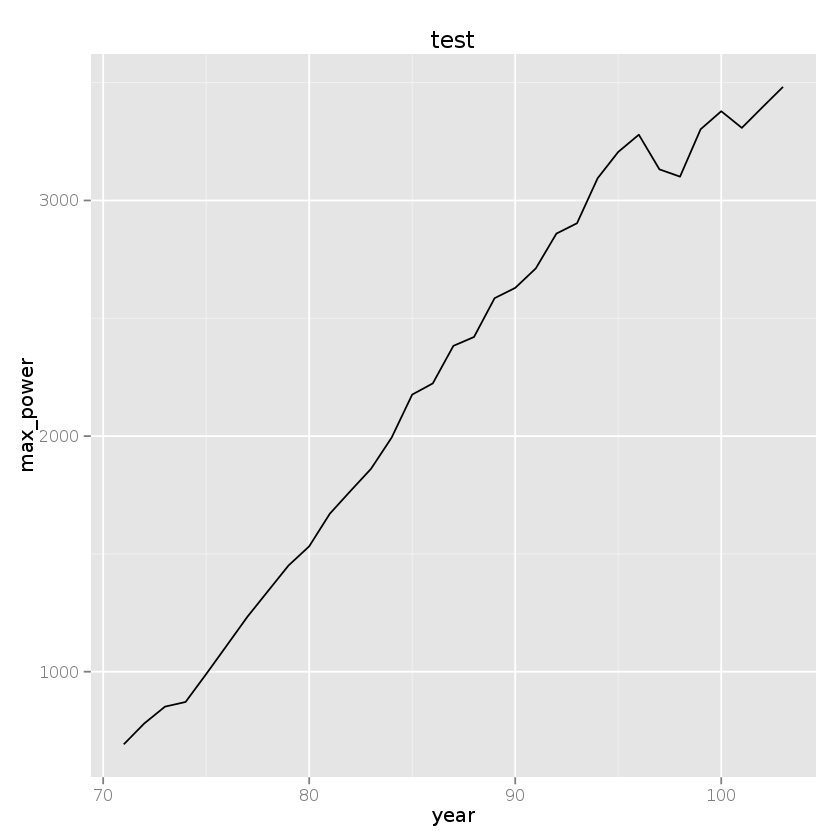

In [67]:
library(ggplot2)
df <- data.frame(year = percent_operating_reserve[[1]],
                 max_power = annual_max_power)
ggplot(df, aes(x = <<你的程式碼>>, y = <<你的程式碼>>)) + 
    geom_line() +
    ggtitle("test")
